11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28), Training labels shape: (60000,)
Testing data shape: (10000, 28, 28), Testing labels shape: (10000,)


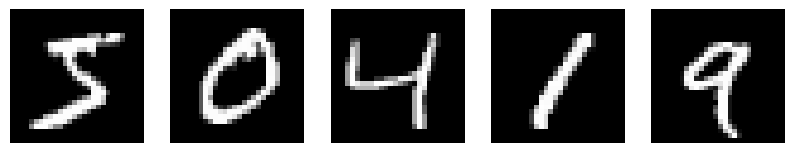

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
# MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print(f"Training data shape: {x_train.shape}, Training labels shape: {y_train.shape}")
print(f"Testing data shape: {x_test.shape}, Testing labels shape: {y_test.shape}")
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
  ax.imshow(x_train[i], cmap='gray')
  ax.axis('off')
plt.show()

In [ ]:
model_baseline = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
 ])
model_baseline.compile(optimizer='adam',                       loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history_baseline = model_baseline.fit(x_train, y_train, epochs=10,validation_data=(x_test,y_test),batch_size=32)
test_loss, test_acc = model_baseline.evaluate(x_test, y_test,verbose=2)
print(f"Test accuracy of baseline model: {test_acc:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8753 - loss: 0.4389 - val_accuracy: 0.9590 - val_loss: 0.1381
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9661 - loss: 0.1164 - val_accuracy: 0.9685 - val_loss: 0.1049
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9763 - loss: 0.0776 - val_accuracy: 0.9751 - val_loss: 0.0825
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9832 - loss: 0.0574 - val_accuracy: 0.9750 - val_loss: 0.0761
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9873 - loss: 0.0409 - val_accuracy: 0.9767 - val_loss: 0.0731
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9899 - loss: 0.0315 - val_accuracy: 0.9779 - val_loss: 0.0739
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9922 - loss: 0.0256 - val_accuracy: 0.9784 - val_loss: 0.0711
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9944 - loss: 0.0189

In [ ]:
model_dropout = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
 ])
model_dropout.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history_dropout = model_dropout.fit(x_train, y_train, epochs=10,validation_data=(x_test, y_test),batch_size=32)
test_loss_dropout, test_acc_dropout = model_dropout.evaluate(x_test,
y_test, verbose=2)
print(f"Test accuracy with Dropout regularization:{test_acc_dropout:.4f}")


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8170 - loss: 0.5984 - val_accuracy: 0.9498 - val_loss: 0.1649
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9324 - loss: 0.2281 - val_accuracy: 0.9625 - val_loss: 0.1181
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9451 - loss: 0.1834 - val_accuracy: 0.9677 - val_loss: 0.1050
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9511 - loss: 0.1631 - val_accuracy: 0.9705 - val_loss: 0.0929
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9549 - loss: 0.1481 - val_accuracy: 0.9723 - val_loss: 0.0918
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9581 - loss: 0.1391 - val_accuracy: 0.9733 - val_loss: 0.0868
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9593 - loss: 0.1285 - val_accuracy: 0.9744 - val_loss: 0.0830
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9609 - loss: 0.124